In [ ]:
# # Read xls file using Pandas and show head rows
# import pandas as pd

# xls_fn = '/Users/ashkanhzdr/workspace/dataset-tools/dataset/test/raw/Analysis/Spots_WR_9.xls'
# # ValueError: Excel file format cannot be determined, you must specify an engine manually. 
# df = pd.read_excel(xls_fp, engine='xlrd')

In [ ]:
# Use pytrackmate to read files
# from pytrackmate import trackmate_peak_import

# fn = '/Users/ashkanhzdr/workspace/dataset-tools/dataset/test/raw/Analysis/Spots_WR_9.xls'
# spots = trackmate_peak_import(fn)
# spots.head()
# Not working

In [64]:
# Read CSV spots file with pandas
import pandas as pd
csv_fn = '/Users/ashkanhzdr/workspace/dataset-tools/dataset/test/raw/Analysis/Spots_WR_11_with_polar.csv'
df = pd.read_csv(csv_fn)
print(len(df))
df.head()

124596


,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,FRAME,MEAN_INTENSITY,Treatment,ID,Distance,Length,Tracking_step,x_recentered,y_recentered,polar_r,polar_theta
0,0,59.717,1065.613,800.272,0,449.952,Spots_WR_11.xls,0_SpotsWR11.xls,0.000000,57,0,35.979808,98.14607,104.533237,1.219415
1,0,60.791,1068.195,800.652,1,454.190,Spots_WR_11.xls,0_SpotsWR11.xls,2.609813,57,1,38.561808,98.52607,105.803590,1.197737
2,0,70.933,1071.911,801.189,2,469.667,Spots_WR_11.xls,0_SpotsWR11.xls,3.754601,57,2,42.277808,99.06307,107.707497,1.167422
3,0,73.767,1073.638,801.178,3,467.810,Spots_WR_11.xls,0_SpotsWR11.xls,1.727035,57,3,44.004808,99.05207,108.386972,1.152727
4,0,80.201,1072.303,803.211,4,474.524,Spots_WR_11.xls,0_SpotsWR11.xls,2.432142,57,4,42.669808,101.08507,109.721939,1.171369


In [66]:
# only show dataframes that have WR_9 in their TREATEMENT column
def tiff_only(df, text):
    df = df[df['Treatment'].str.contains(text)]
    return df

df_tiff = tiff_only(df, 'WR_11')
df_tiff.head()

,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,FRAME,MEAN_INTENSITY,Treatment,ID,Distance,Length,Tracking_step,x_recentered,y_recentered,polar_r,polar_theta
0,0,59.717,1065.613,800.272,0,449.952,Spots_WR_11.xls,0_SpotsWR11.xls,0.000000,57,0,35.979808,98.14607,104.533237,1.219415
1,0,60.791,1068.195,800.652,1,454.190,Spots_WR_11.xls,0_SpotsWR11.xls,2.609813,57,1,38.561808,98.52607,105.803590,1.197737
2,0,70.933,1071.911,801.189,2,469.667,Spots_WR_11.xls,0_SpotsWR11.xls,3.754601,57,2,42.277808,99.06307,107.707497,1.167422
3,0,73.767,1073.638,801.178,3,467.810,Spots_WR_11.xls,0_SpotsWR11.xls,1.727035,57,3,44.004808,99.05207,108.386972,1.152727
4,0,80.201,1072.303,803.211,4,474.524,Spots_WR_11.xls,0_SpotsWR11.xls,2.432142,57,4,42.669808,101.08507,109.721939,1.171369


In [67]:
# Select only dataframe with specified columns for 'FRAME'
frame_index = 50
df_frame = df_tiff[df_tiff['FRAME'] == frame_index]
print(len(df_frame))
df_frame.head(20)

# Extract POSITION_X and POSITION_Y from df_frame and make a python list from it.
import numpy as np


pos_x = df_frame['POSITION_X'].values
pos_y = df_frame['POSITION_Y'].values
# 1x1 px = 3.1746 um x 3.1746 um
pos_x /= 3.1746
pos_y /= 3.1746
frame_pos = np.concatenate((pos_x.reshape(-1, 1), pos_y.reshape(-1, 1)), axis=1)

frame_pos

161


array([[342.06010206, 269.94518995],
       [350.31909532, 269.38102438],
       [358.997984  , 264.53568954],
       [318.60927361, 253.14149814],
       [339.81855982, 228.21237321],
       [366.23385623, 206.87267687],
       [308.90978391, 229.02475902],
       [347.16027216, 191.88842689],
       [348.69495369, 225.5975556 ],
       [328.34782335, 170.92515593],
       [396.19101619, 252.004347  ],
       [319.6991747 , 186.80526681],
       [306.33875134, 268.78189378],
       [304.91148491, 262.73073773],
       [287.23870724, 194.74610975],
       [317.72065772, 206.02942103],
       [284.47961948, 209.64845965],
       [287.84728785, 202.94493794],
       [306.30851131, 178.16449316],
       [301.71675172, 194.80532981],
       [321.56082656, 245.55408555],
       [370.3975304 , 248.48579349],
       [309.69129969, 165.30681031],
       [383.32766333, 229.41819442],
       [377.63970264, 234.10508411],
       [321.96969697, 291.80778681],
       [344.84218484, 174.26825427],
 

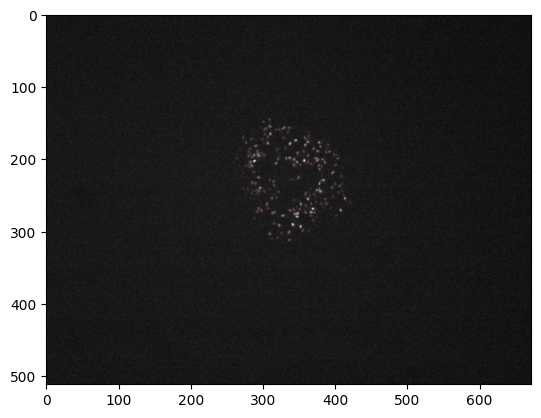

In [69]:
# show tiff image from file
import matplotlib.pyplot as plt
import tifffile

tiff_fn = '/Users/ashkanhzdr/workspace/dataset-tools/dataset/test/raw/Movies/WR_11.tif'

with tifffile.TiffFile(tiff_fn) as tiff:
    frame_img = tiff.pages[frame_index].asarray()

plt.imshow(frame_img, cmap='gray')
# Plot frame_pos on the image using matplotlib.
plt.plot(frame_pos[:, 0], frame_pos[:, 1], 'ro', markersize=0.1)